__Utilizar lo que hemos visto hasta ahora de Julia para:__

1. Graficar como convergen $4$ condiciones iniciales a las raiz real de $x^3 - x^2 - x - 1$ utilizando el método de Newton. Ésto básicamente es gráficar como se mueven los puntos $x_k$, luego grafiquen el error relativo a la raiz, es decir $(x_k-S)/S$, donde $S$ es la raiz.

2. Crear una función en Julia que implemente el método de Newton para funciones arbitrarias. Deberán crearla con las siguientes consideraciones:
    * Que tome como argumentos tanto a la función, su derivada y la condición inicial. Es decir, el input debe ser 'metodo_newton.(f,df,x)'.
    * Crear la misma rutina pero que esta vez sólo reciba intervalos y que revise el arreglo después de $200$ iteraciones y sólo tome las raíces diferentes hasta cierto $\epsilon$.
    * Hacer la misma función pero que en lugar de tomar como argumento una condición inicial, tome un intervalo, por ejemplo costruido con `linspace`, recordando que hay que llamar a las funciones con un punto `f.(x)`.
    * Combinar las dos formas en una sola rutina, aqui será necesario poner un condicional `if` que verifique de que tipo es el _input_.
    * Finalmente, desarrollen una función similar a la anterior, siguiendo los mismos pasos, pero esta vez que los _inputs_ de la función del método sea solamente la función y la condición (o intervalo) inicial.
        * Para esto deberán usar lo que aprendimos de SymPy y como podemos convertir y/o evaluar funciones tanto en simbolos como en flotantes.
        
__Nota:__ Se resolveran dudas de esta tarea el Martes 29, así que traten de avanzar para que surjan dudas.


In [16]:
using PyPlot

INFO: Recompiling stale cache file /home/juser/.julia/lib/v0.6/PyCall.ji for module PyCall.
INFO: Recompiling stale cache file /home/juser/.julia/lib/v0.6/PyPlot.ji for module PyPlot.


In [44]:
f(x)=x^3-x^2-x-1
derivada(x)=3x^2-2x-1

derivada (generic function with 1 method)

In [57]:

function raiz(inicial)
    list=zeros(30)
    x=inicial
    for i in 1:30
        x=x-(f(x)/derivada(x))
        list[i]=x;
    end
    return list
end

raiz (generic function with 1 method)

In [62]:
list1=raiz(0.1);
list2=raiz(1.1);
list3=raiz(1.5);
list4=raiz(3.5);
listn = 1: length(list4)

1:30

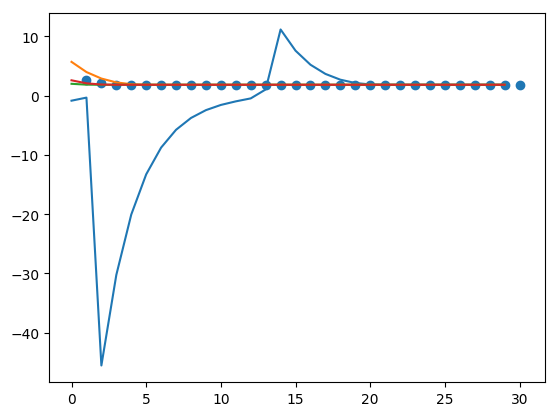

In [63]:
#yscale("symlog", linthreshy=0.05)
plot(real(list1))
plot(real(list2))
plot(real(list3))
plot(real(list4))
PyPlot.scatter(listn,list4)
show();